<center><img src="https://media-cdn.wehco.com/img/photos/2017/02/07/freetuitionweb2002252498.jpg" align='center' width="1100"/>
<div align='center'><H1>The Economic Guide To Picking A College Major</H1></div>

## Millions of American college students heading back to campus next month face a grim reality: 

## A college degree is no guarantee of economic success.




## And so does choosing the right major, help in boosting students chances for economic success?

## Let's dive into the data set from American Community Survey 2010-2012 to find more about the student graduate data


### 1. What are the popular college major category?
### 2. Which college major category is popular for men and women?
### 3. Among the popular major categories what majors are men and women taking?
### 4. What are most popular and least popular majors with men and women ?

### 5. Who has the highest median earnings in each major category ?
### 6. Is the most popular major also the highest paying?
### 7. Are there differences in earnings between majors in related category?
### 8. Are students choosing majors with career prospects?
### 9. Are all “STEM” — science, technology, engineering and math — majors have the same earning potential

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
recent_grads_df =  pd.read_csv("../data/recent-grads.csv")

In [3]:
# drop the one column for missing values -- Rank #22 Food science
recent_grads_df.dropna(inplace=True)

### 1. What are the popular college major category?

#### * Most popular major category is Business and Communications & Journalism
#### * Least popular category is Agriculture & Natural Resources

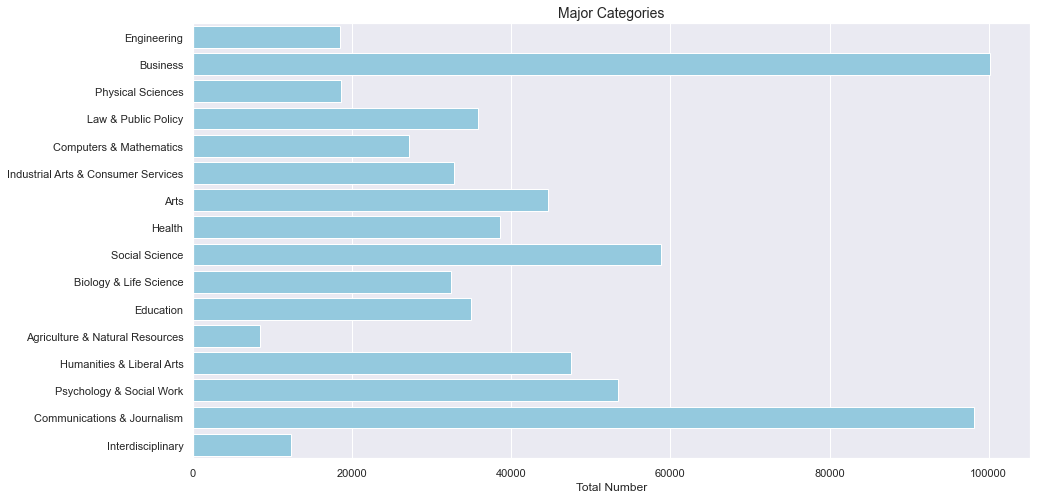

In [11]:
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
mc = sns.barplot(x='Total', y="Major_category", data=recent_grads_df, ci=None, color='skyblue')

mc.set_title('Major Categories', fontsize=14)
mc.set(xlabel='Total Number', ylabel='');

### 2. Which college major category is popular for men and women?

#### * Most popular major with men is Business and then Communications & Journalism

#### * Most popular major with women is Communications & Journalism and then Business

#### * Social Science, Physical Sciences and Law & Public Policy are of interest for both men and women 

#### * Engineering and Computers & Maths are more popular with men than women

#### * Arts, Health, Education and psychology & Social work are more popular with women than men

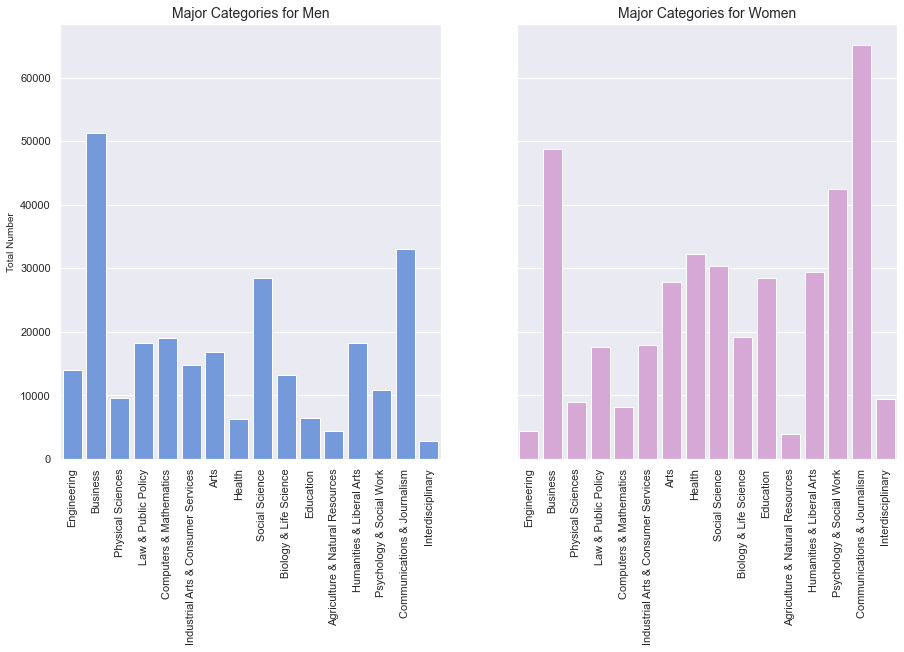

In [12]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
g1 = sns.barplot(x= 'Major_category', y = 'Men', data = recent_grads_df, ci=None, color='cornflowerblue',ax=ax0)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
g1.set_title('Major Categories for Men', fontsize=14)
g1.set_ylabel("Total Number",fontsize=10)
g1.set_xlabel('');

g2 = sns.barplot(x= 'Major_category', y = 'Women', data = recent_grads_df, ci=None,color='plum', ax=ax1)
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
g2.set_title('Major Categories for Women', fontsize=14)
g2.set(xlabel='', ylabel='');

### 3. Among the popular major categories what majors are men and women taking?

#### * One of the popular major category is Business for both men and women

#### * In Business category Business management & Administration is most popular with both men and women

#### * Actuarial science is least popular with both men and women


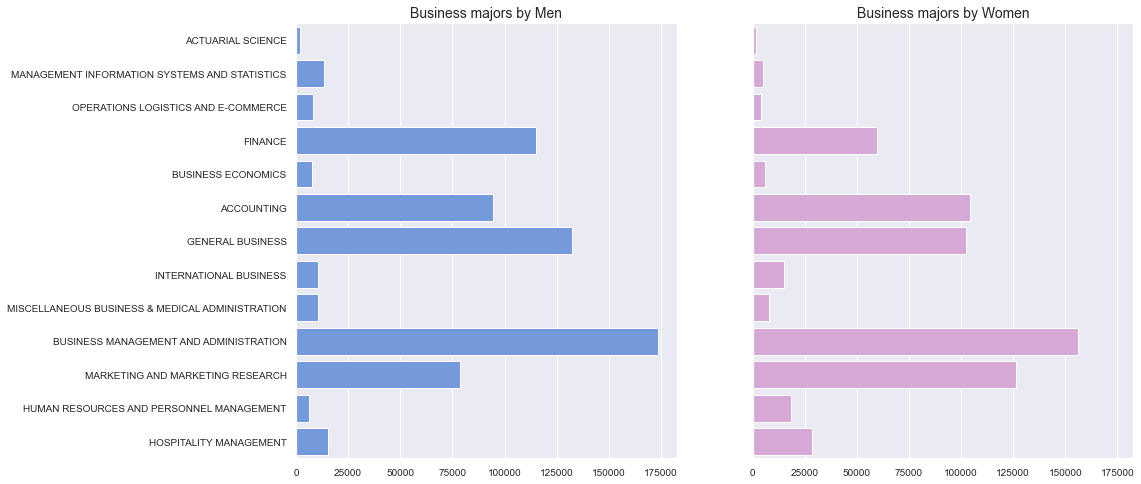

In [13]:
def get_majors(major_cat):
    
    df = recent_grads_df[recent_grads_df['Major_category'] == major_cat]
    
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True)
   

    g1 = sns.barplot(x= 'Men', y = 'Major', data = df, ci=None, color='cornflowerblue',ax=ax0)
    g1.set_title(f'{major_cat} majors by Men', fontsize=14)
    g1.tick_params(labelsize=10)
    g1.set(xlabel='', ylabel='');

    g2 = sns.barplot(x= 'Women', y = 'Major', data = df, ci=None,color='plum', ax=ax1)
    g2.set_title(f'{major_cat} majors by Women', fontsize=14)
    g2.tick_params(labelsize=10)
    g2.set(xlabel='', ylabel='');
    
get_majors('Business')

### 3.1  Next popular major category for men and women is Communication & Journalism

#### * Communications major has more then double women majors than men

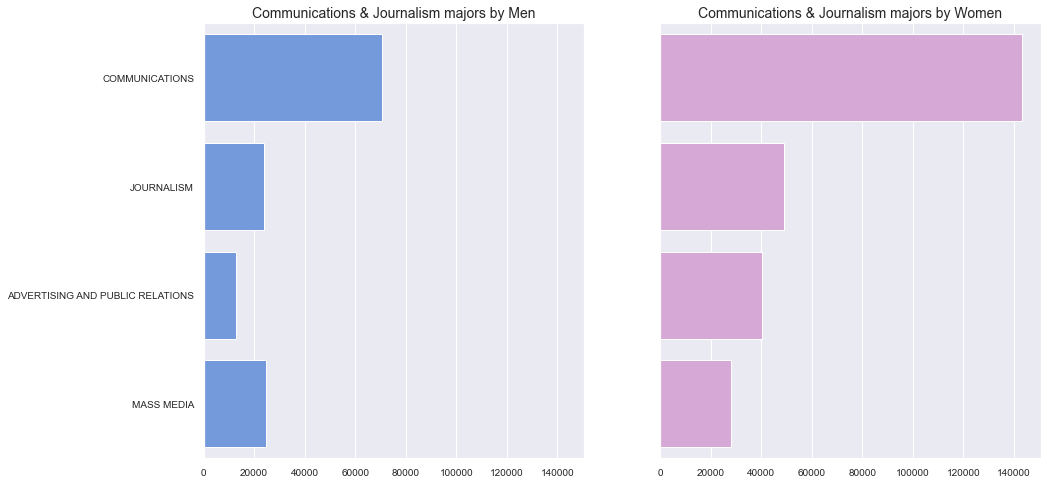

In [14]:
get_majors('Communications & Journalism')

### 3.2  Another popular major category for women is Psychology & Social Work

#### * Psychology major has more than four times women majors than men

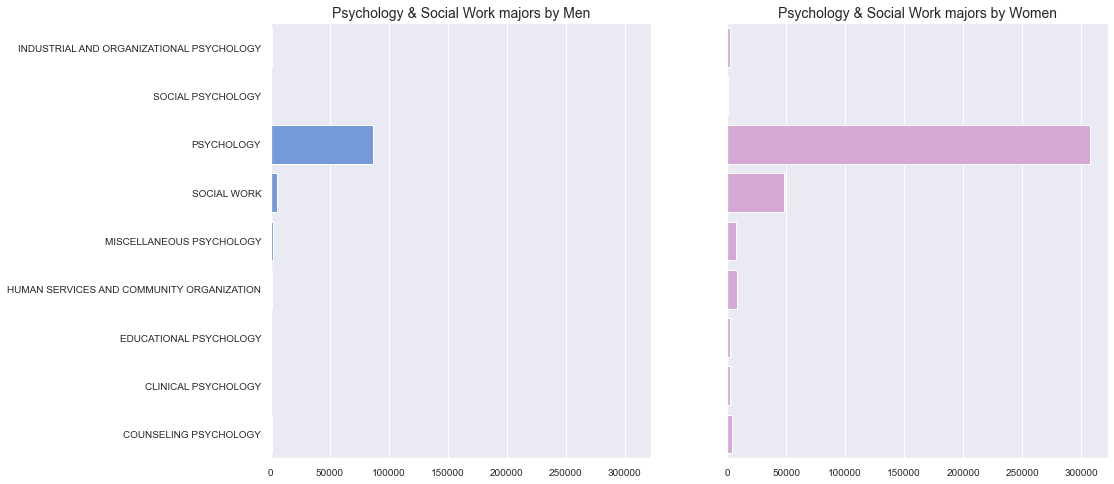

In [15]:
get_majors('Psychology & Social Work')

### 4. What are most popular and least popular majors with men and women ?

#### * Business Management & Administration, General Business and Finance are the top three popular majors for men

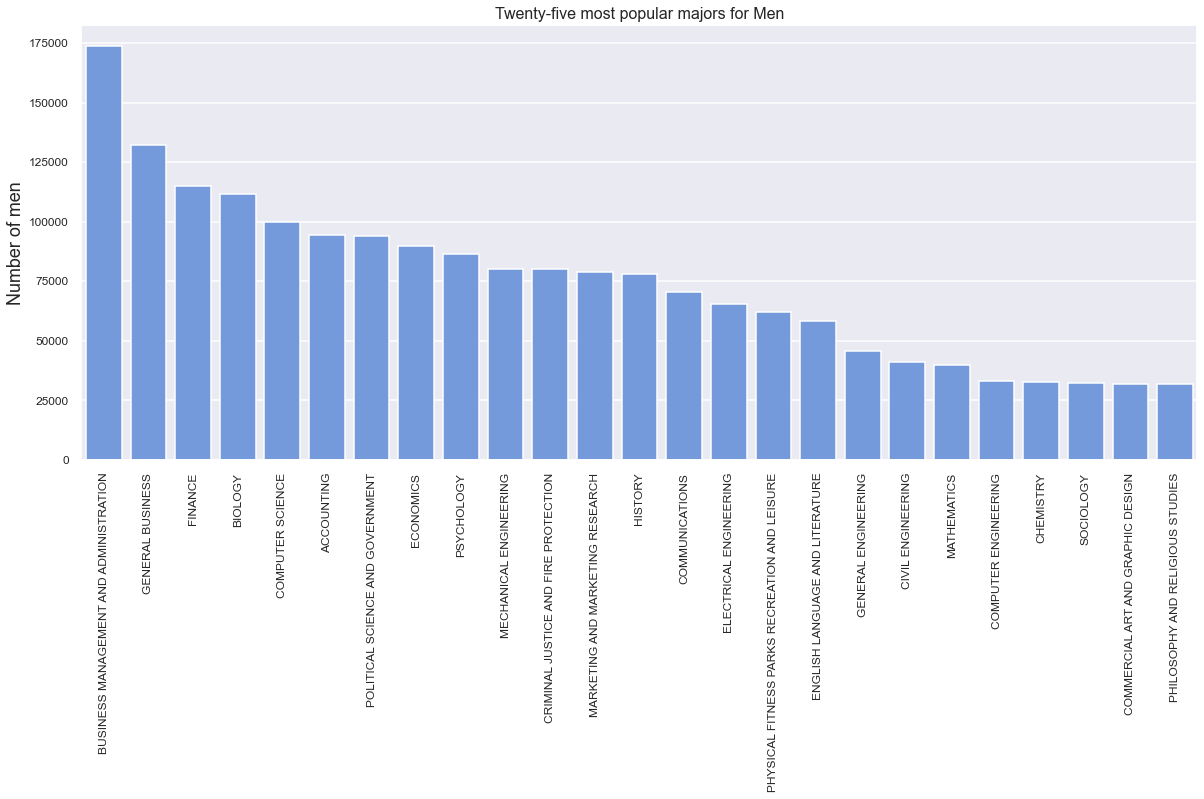

In [28]:
plt.figure(figsize=(20,8))
g1 = sns.barplot(x= 'Major', y = 'Men', 
                 data = recent_grads_df.sort_values('Men', ascending = False)[0:25], 
                 order=recent_grads_df.sort_values('Men', ascending = False)[0:25].Major,
                 ci=None, color='cornflowerblue')
g1.set_title('Twenty-five most popular majors for Men', fontsize= 16)
g1.set_xlabel("")
g1.set_ylabel("Number of men")
g1.tick_params(labelsize=12)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);

### 4.1 Which college majors are popular with women?

#### * Psychology is the most popular major with women, followed by Nursing and Biology

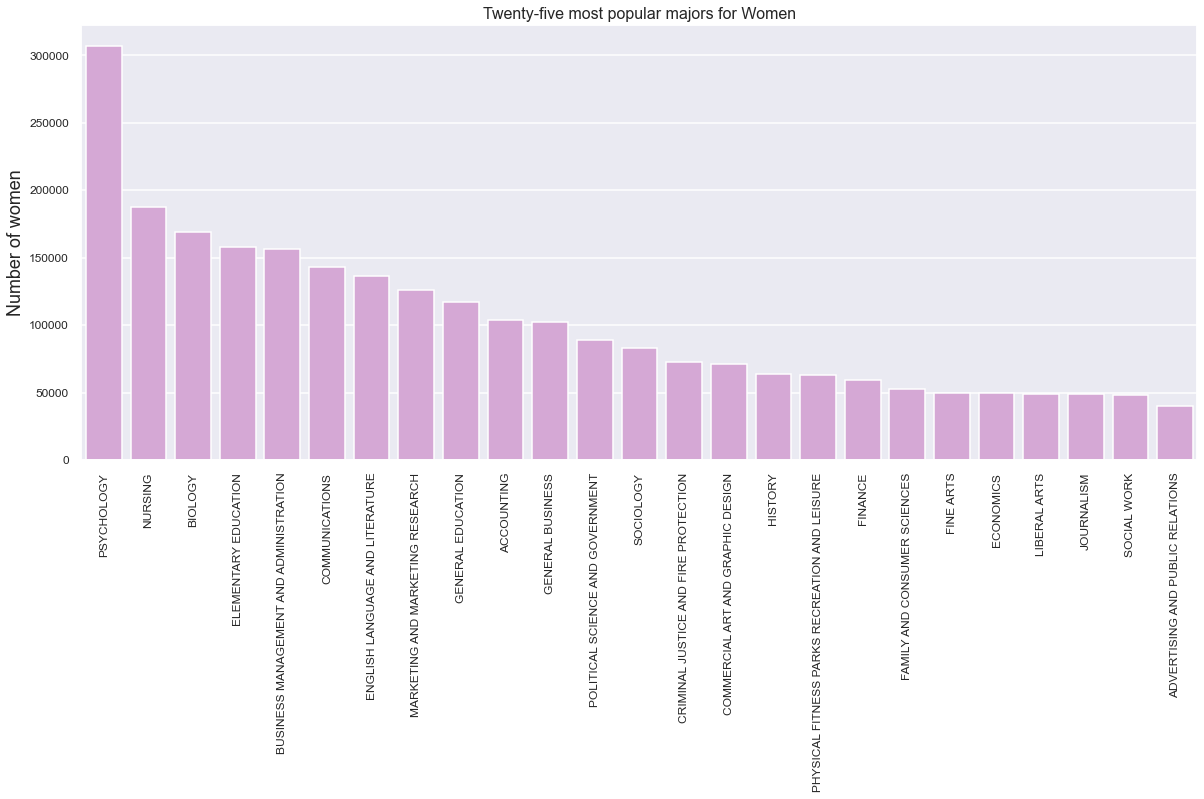

In [29]:
plt.figure(figsize=(20,8))
g1 = sns.barplot(x= 'Major', y = 'Women', 
                 data = recent_grads_df.sort_values('Women', ascending = False)[0:25], 
                 order=recent_grads_df.sort_values('Women', ascending = False)[0:25].Major,
                 ci=None, color='plum')
g1.set_title('Twenty-five most popular majors for Women', fontsize= 16)
g1.set_xlabel("")
g1.set_ylabel("Number of women")
g1.tick_params(labelsize=12)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);

### 4.2 Which are the least popular majors for men ( less than 1750)?

#### * Library Science, Military Technologies and School student counseling are least popular with men

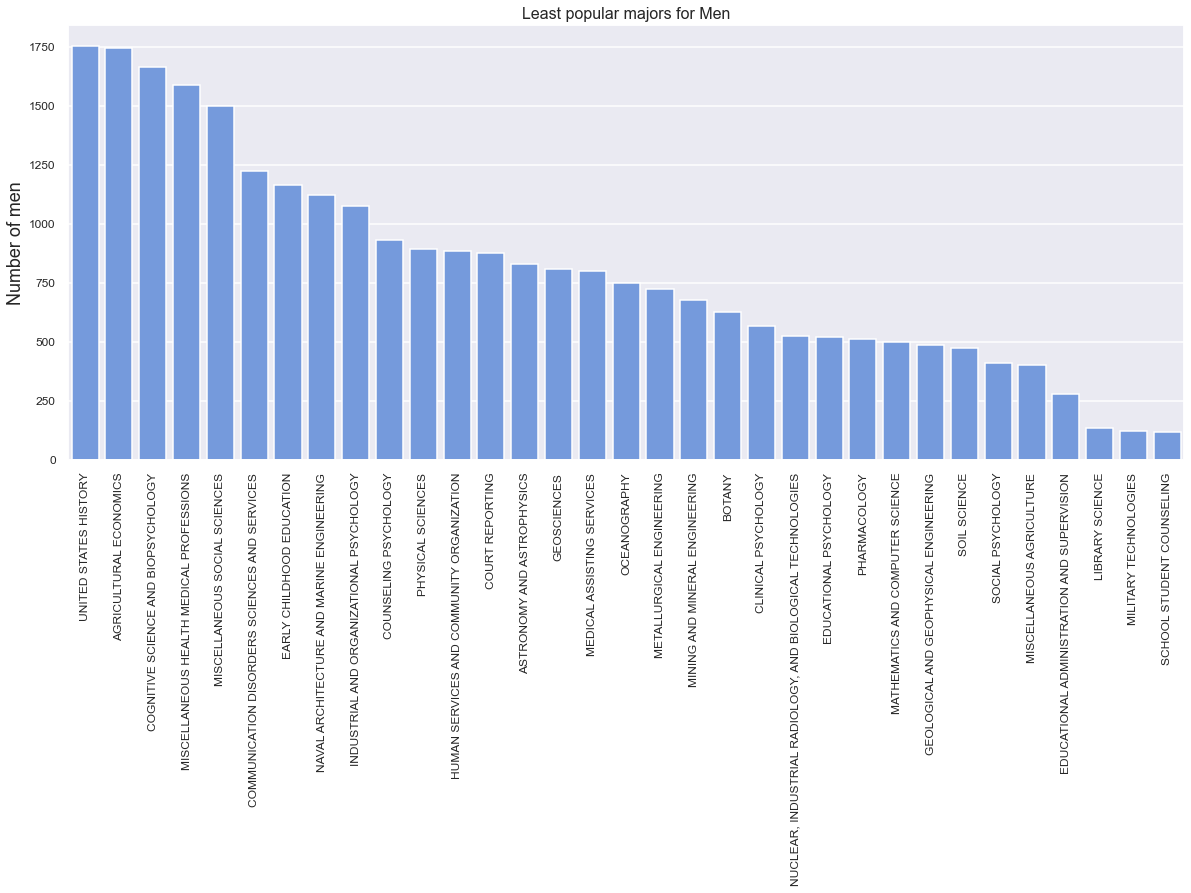

In [31]:
plt.figure(figsize=(20,8))
g1 = sns.barplot(x= 'Major', y = 'Men', 
                 data = recent_grads_df.sort_values('Men', ascending = False)[139:], 
                 order=recent_grads_df.sort_values('Men', ascending = False)[139:].Major,
                 ci=None, color='cornflowerblue')
g1.set_title('Least popular majors for Men', fontsize= 16)
g1.set_xlabel("")
g1.set_ylabel("Number of men")
g1.tick_params(labelsize=12)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);

### 4.3 Which are the least popular majors for women ( less than 1750)?

#### * Military Technologies, Mining & Mineral Engineering, Maths & Computer Science majors are less popular with women

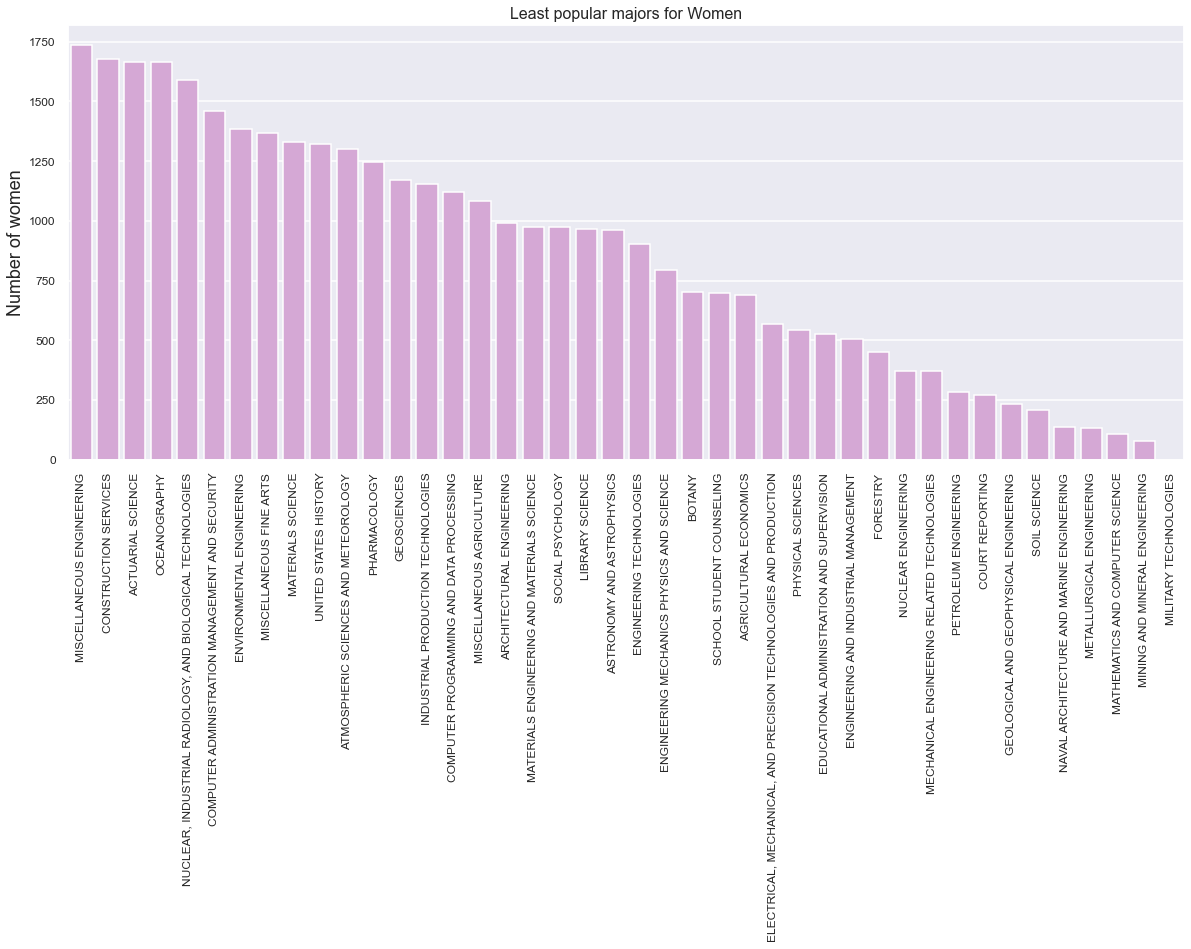

In [32]:
plt.figure(figsize=(20,8))
g1 = sns.barplot(x= 'Major', y = 'Women', 
                 data = recent_grads_df.sort_values('Women',ascending = False)[130:], 
                 order=recent_grads_df.sort_values('Women', ascending = False)[130:].Major,
                 ci=None, color='plum')
g1.set_title('Least popular majors for Women', fontsize= 16)
g1.set_xlabel("")
g1.set_ylabel("Number of women")
g1.tick_params(labelsize=12)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);

### 5. Who has the highest median earnings in each major category ?

#### * Majors in Engineering has the highest median earnings
#### * Majors in Education and Psychology & Social work has the lowest median earnings

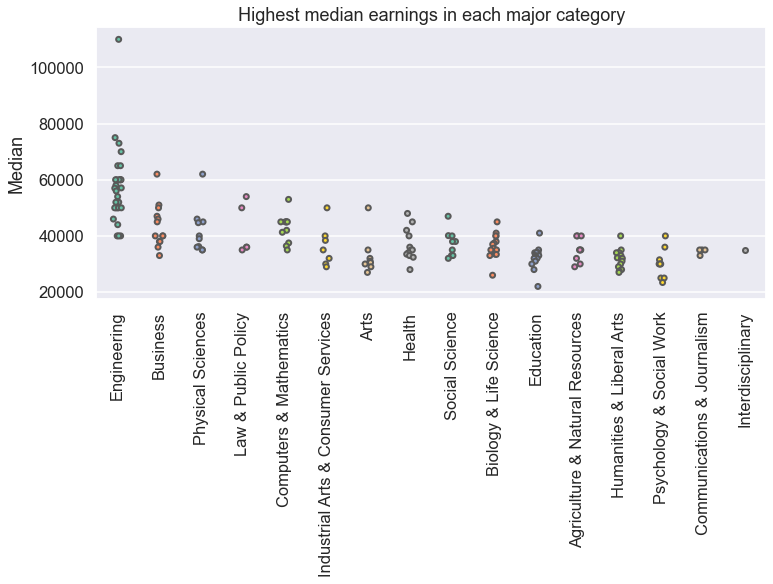

In [23]:
sns.set_context('talk')
plt.figure(figsize=(12,5))
sp = sns.stripplot(x='Major_category', y='Median', data=recent_grads_df, jitter=True,linewidth=2, dodge=True, palette="Set2")
sp.set_title('Highest median earnings in each major category')
sp.set_xlabel('')
sp.set_xticklabels(sp.get_xticklabels(), rotation=90);

### 5.1 Who are the top Earners?

#### * Majority are from the Engineering category, with Petroleum Engineering at the top
#### * Actuarial Science from Business are also in this group
#### * 75th percentile earners of Astronomy & Astrophysics earn better than most engineers


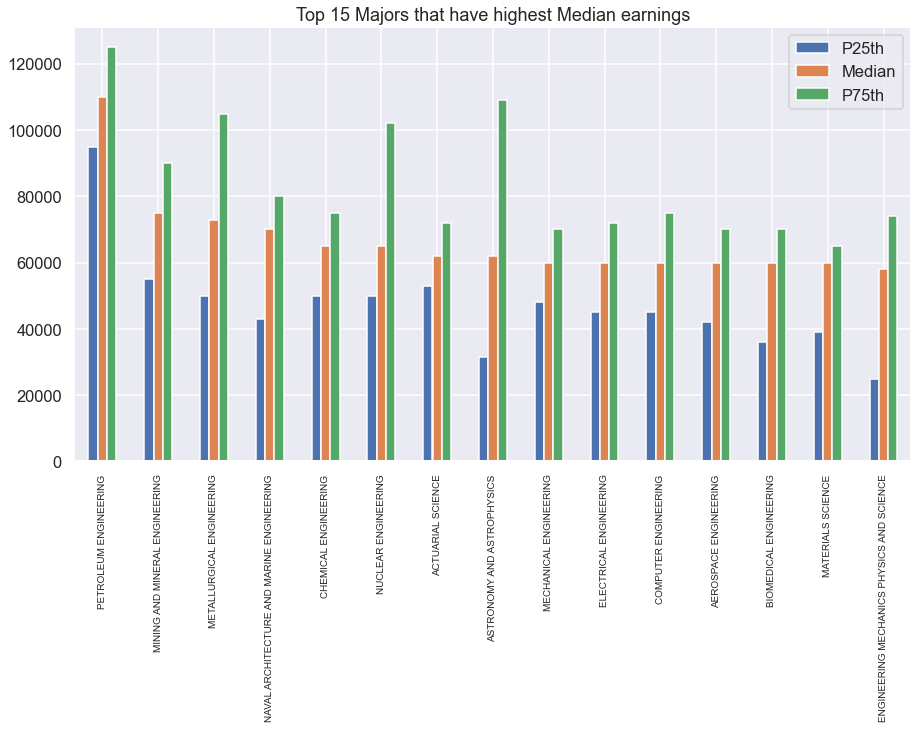

In [24]:
# Looking at the top 15 earners
recent_grads_df[:15].plot(x="Major", y=["P25th", "Median", "P75th"], kind='bar')
plt.xticks(fontsize=10,rotation = 90)
plt.xlabel('')
plt.title("Top 15 Majors that have highest Median earnings");

### 5.2 Distribution of Men and Women in the Top 15 Earnings

#### * Mechanical engineering is popular with men followed by Electrical engineering
#### * Electrical, Mechanical and Chemical engineering are some of the majors taken by Women

### Women representation in the engineering category is low

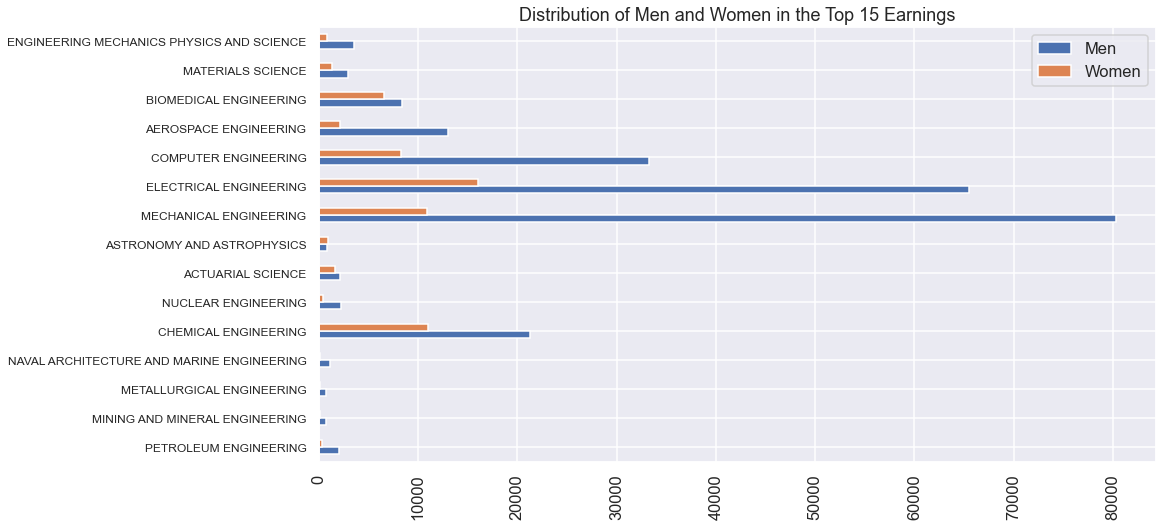

In [25]:
# Looking at the top 10 earners
recent_grads_df[:15].plot(x="Major", y=["Men", "Women"], kind='barh')
plt.xticks(rotation = 90)
plt.yticks(fontsize=12)
plt.ylabel('')
plt.title("Distribution of Men and Women in the Top 15 Earnings");

## 6. Is the most popular major also the highest paying?


#### * The top earners are in the Engineering category

#### * Petroleum engineering, the highest-paying major, earns a median amount of $110,000 are among the least popular fields of study

#### * Military Technologies major are least popular, as it can be because only few selected applicants get into these programs

#### * Psychology one of the lowest paying job, with median wage of $31,500 is a very popular major especially with women

#### * Simple explanation is that technical majors are hard and not everyone is cut out to be an engineer

## 7. Are there differences in earnings between majors in related category?

#### * Actuarial science majors (best paid of the non-engineering major) earn more than accounting majors

#### * Public policy majors out-earn history majors

#### * Court reporting is a better earnings bet than criminology

## 8.  Are students choosing majors with career prospects?

#### Many students no doubt would have chosen to study psychology even if they had known about their uncertain career prospects.

#### This can be because many colleges and universities do little to push their students to make informed choices about what to study.

## 9. Are all “STEM” — science, technology, engineering and math — majors have the same earning potential

#### * Engineering related majors are high earners

#### * Other sciences like neuroscience, meteorology, biology and ecology all stand to make $35,000 or less 